In [1]:
import pandas as pd
import numpy as np
import explore_leafly_data as eld
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = eld.load_data()

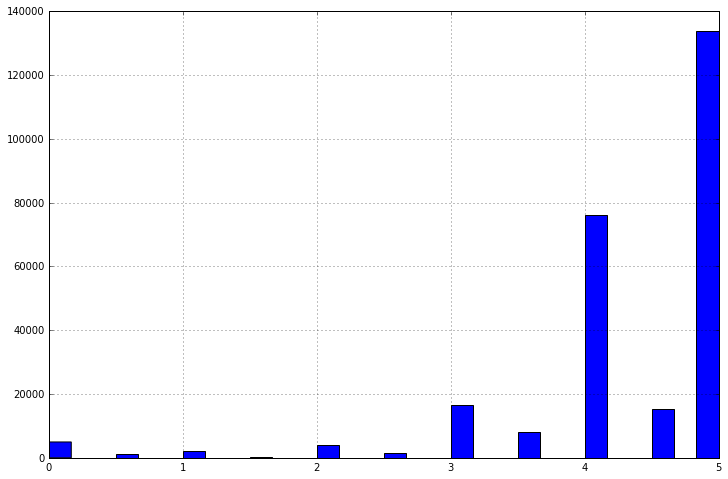

In [32]:
f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = df.rating.hist(ax=ax, bins=30)

In [33]:
df.rating.mean()

4.3008760823085206

In [35]:
print df.user.unique().shape[0], 'unique users'

65774 unique users


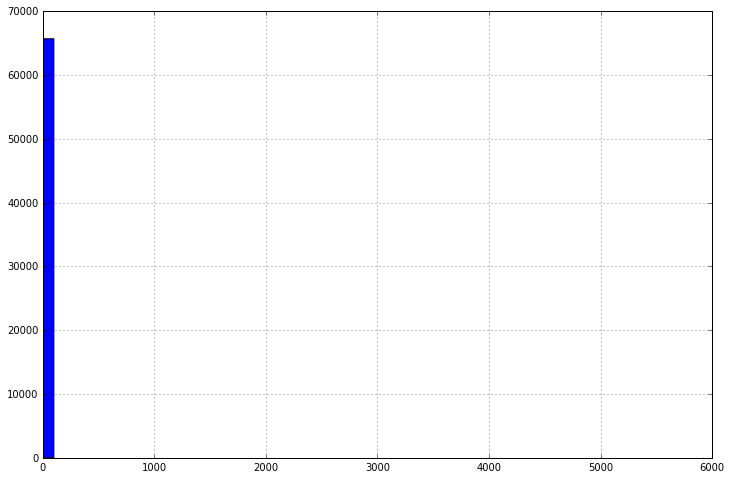

In [44]:
users = df.groupby('user').count()

f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = users.rating.hist(ax=ax, bins=50)

In [38]:
print 'max number of ratings by a user:', users.rating.max()
print 'for user', users.rating.argmax()

max number of ratings by a user: 5012
for user Anonymous


# uhhh...need to remove 'anonymous' reviews. Riiiight

In [39]:
df_no_anon = df[df['user'] != 'Anonymous']

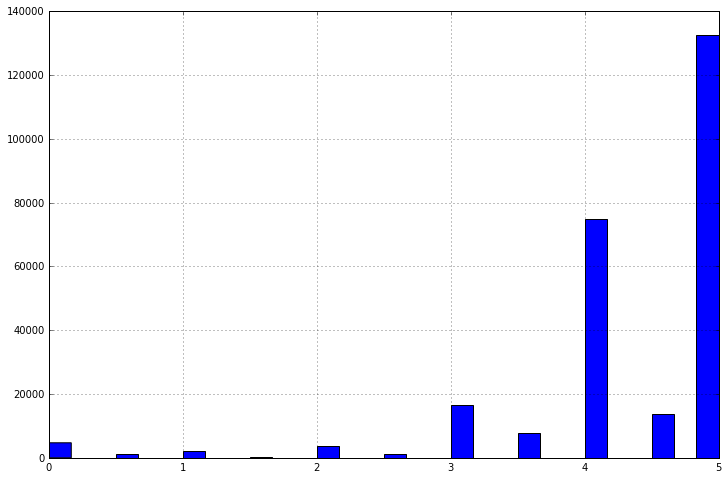

In [41]:
f =plt.figure(figsize=(12, 8))
ax = plt.gca()
f = df_no_anon.rating.hist(ax=ax, bins=30)

In [43]:
df.rating.mean()

4.3008760823085206

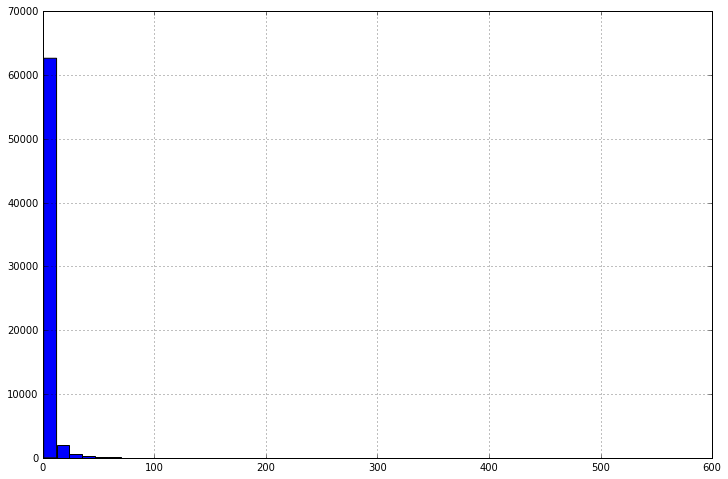

In [47]:
users = df_no_anon.groupby('user').count()

f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = users.rating.hist(ax=ax, bins=50)

In [48]:
print 'max number of ratings by a user:', users.rating.max()
print 'for user', users.rating.argmax()

max number of ratings by a user: 578
for user Chill_Panda


In [68]:
# users with fewer than 20 ratings
fewer_ratings = users[users['rating'] < 20]

In [62]:
fewer_ratings.shape[0]

64192

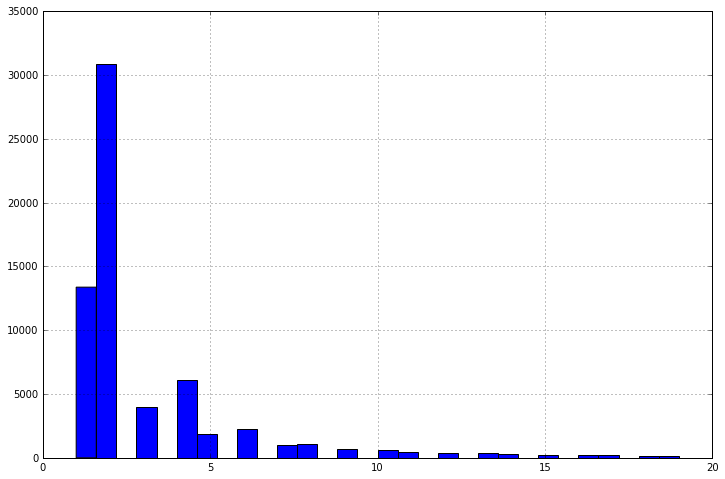

In [63]:
f = plt.figure(figsize=(12, 8))
ax = plt.gca()
f = fewer_ratings.rating.hist(ax=ax, bins=30)

In [65]:
fewer_ratings.rating.mean()

3.0480589481555334

In [67]:
fewer_ratings.rating.mode()[0]

2

In [60]:
df[df['user'] == 'Anonymous'].shape[0]

5012

In [61]:
df.shape[0]

263788

In [70]:
# users with more than 2 ratings
more_ratings = users[users['rating'] > 2]

In [71]:
more_ratings.shape[0]

21513